# <center> **Kaggle’s Spaceship Titanic Competition**
# <center> **Exploratory Data Analysis**

# **Libraries**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

from scipy.stats import spearmanr

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display Parameters**

## **Display**

In [89]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

size = 20

## **Colors**

In [90]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "indianred"
color_7 = "slategrey"
color_8 = "salmon"
color_9 = "beige"
color_10 = "coral"
color_11 = "grey"
color_12 = "tan"
color_13 = "wheat"
color_14 = "tomato"

# **Loading Data**

In [92]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

In [93]:
transported_true = train[train['Transported'] == True]
transported_false = train[train['Transported'] == False]

# **Exploratory Data Analysis**

## **Target Disbribution**

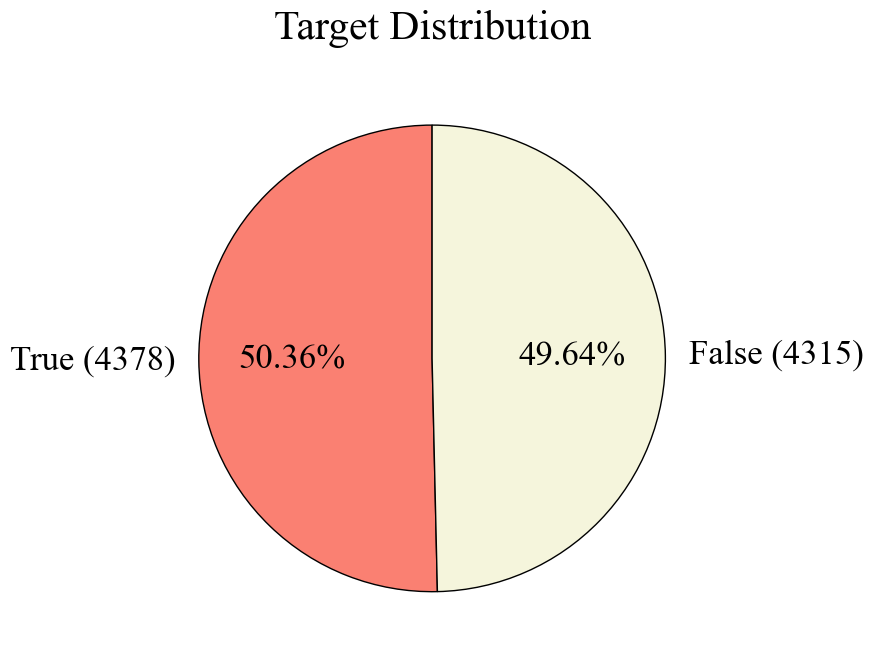

In [94]:
data = train['Transported'].value_counts()
colors = [color_8, color_9]
labels = [f'True ({data[True]})', f'False ({data[False]})']
title = "Target Distribution"

functions.piechart(data, title, colors, labels, size)

### **Insights**

> * **Percentage of Transported Passengers:** Approximately 50% of all passengers.
> * **Percentage of Passengers who were Not Transported:** Approximately 50% of all passengers.
> * **Conclusion:** This is a balanced dataset.

## **Home Planet**

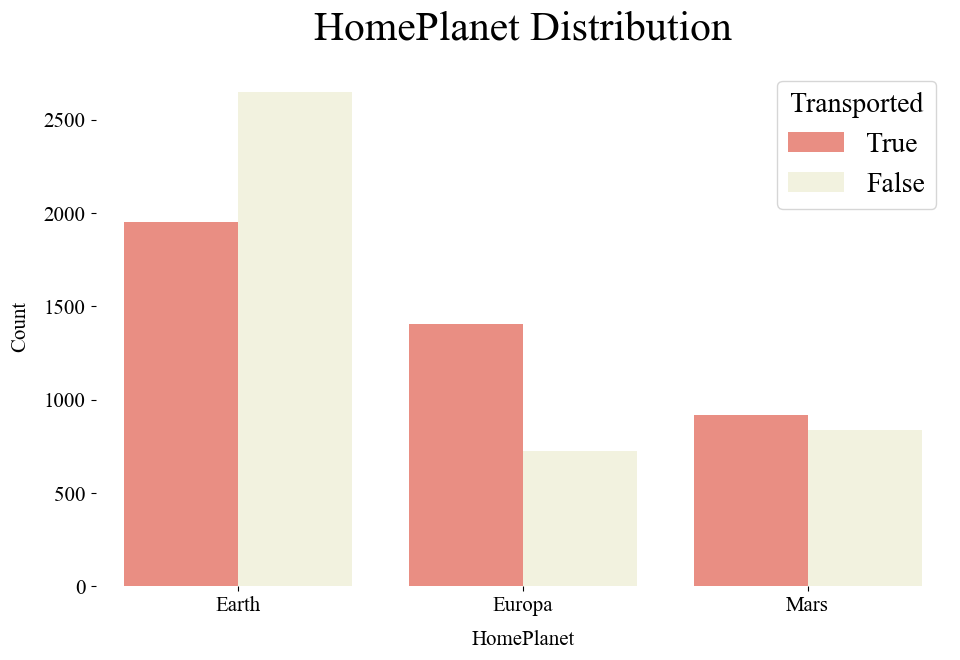

In [95]:
data_1 = transported_true
data_2 = transported_false
feature = "HomePlanet"
title = "HomePlanet Distribution"
order = transported_true['HomePlanet'].value_counts().index
labels = feature
label_fontsize = size * 0.75
title_fontsize = size * 1.5
hue_order=[True, False]

functions.combined_countplot(data_1, data_2, feature, title, order, color_8, color_9, labels, label_fontsize, title_fontsize, hue_order)

### **Insights**

> * **Transported == True Order:** Earth, Europa, Mars
> * **Transported == False Order:** Earth, Mars, Europa
> * **Conclusion:** The home planet of majority of passengers, both those who were transported and those who were not was Earth.

## **Destination Planet**

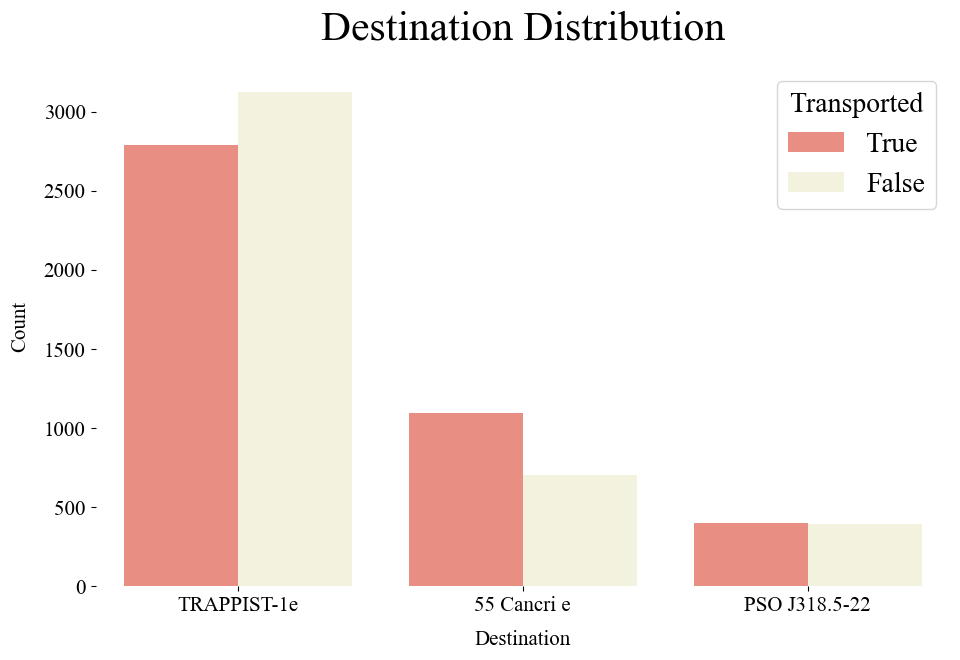

In [96]:
data_1 = transported_true
data_2 = transported_false
feature = "Destination"
title = "Destination Distribution"
order = transported_true['Destination'].value_counts().index
labels = feature
label_fontsize = size * 0.75
title_fontsize = size * 1.5
hue_order=[True, False]

functions.combined_countplot(data_1, data_2, feature, title, order, color_8, color_9, labels, label_fontsize, title_fontsize, hue_order)

### **Insights**

> * **Transported == True Order:** TRAPPIST-1e, 55 Cancri e, PSO J318.5-22
> * **Transported == False Order:** TRAPPIST-1e, 55 Cancri e, PSO J318.5-22
> * **Conclusion:** The destination of majority of passengers, both those who were transported and those who were not was TRAPPIST-1e.

## **Solo Travelers**

In [97]:
transported_true_lone_true, transported_true_lone_false = functions.passenger_distribution(train, 'LoneTraveler', True)
transported_true_lone = [transported_true_lone_true, transported_true_lone_false]

In [98]:
transported_false_lone_true, transported_false_lone_false = functions.passenger_distribution(train, 'LoneTraveler', False)
transported_false_lone = [transported_false_lone_true, transported_false_lone_false]

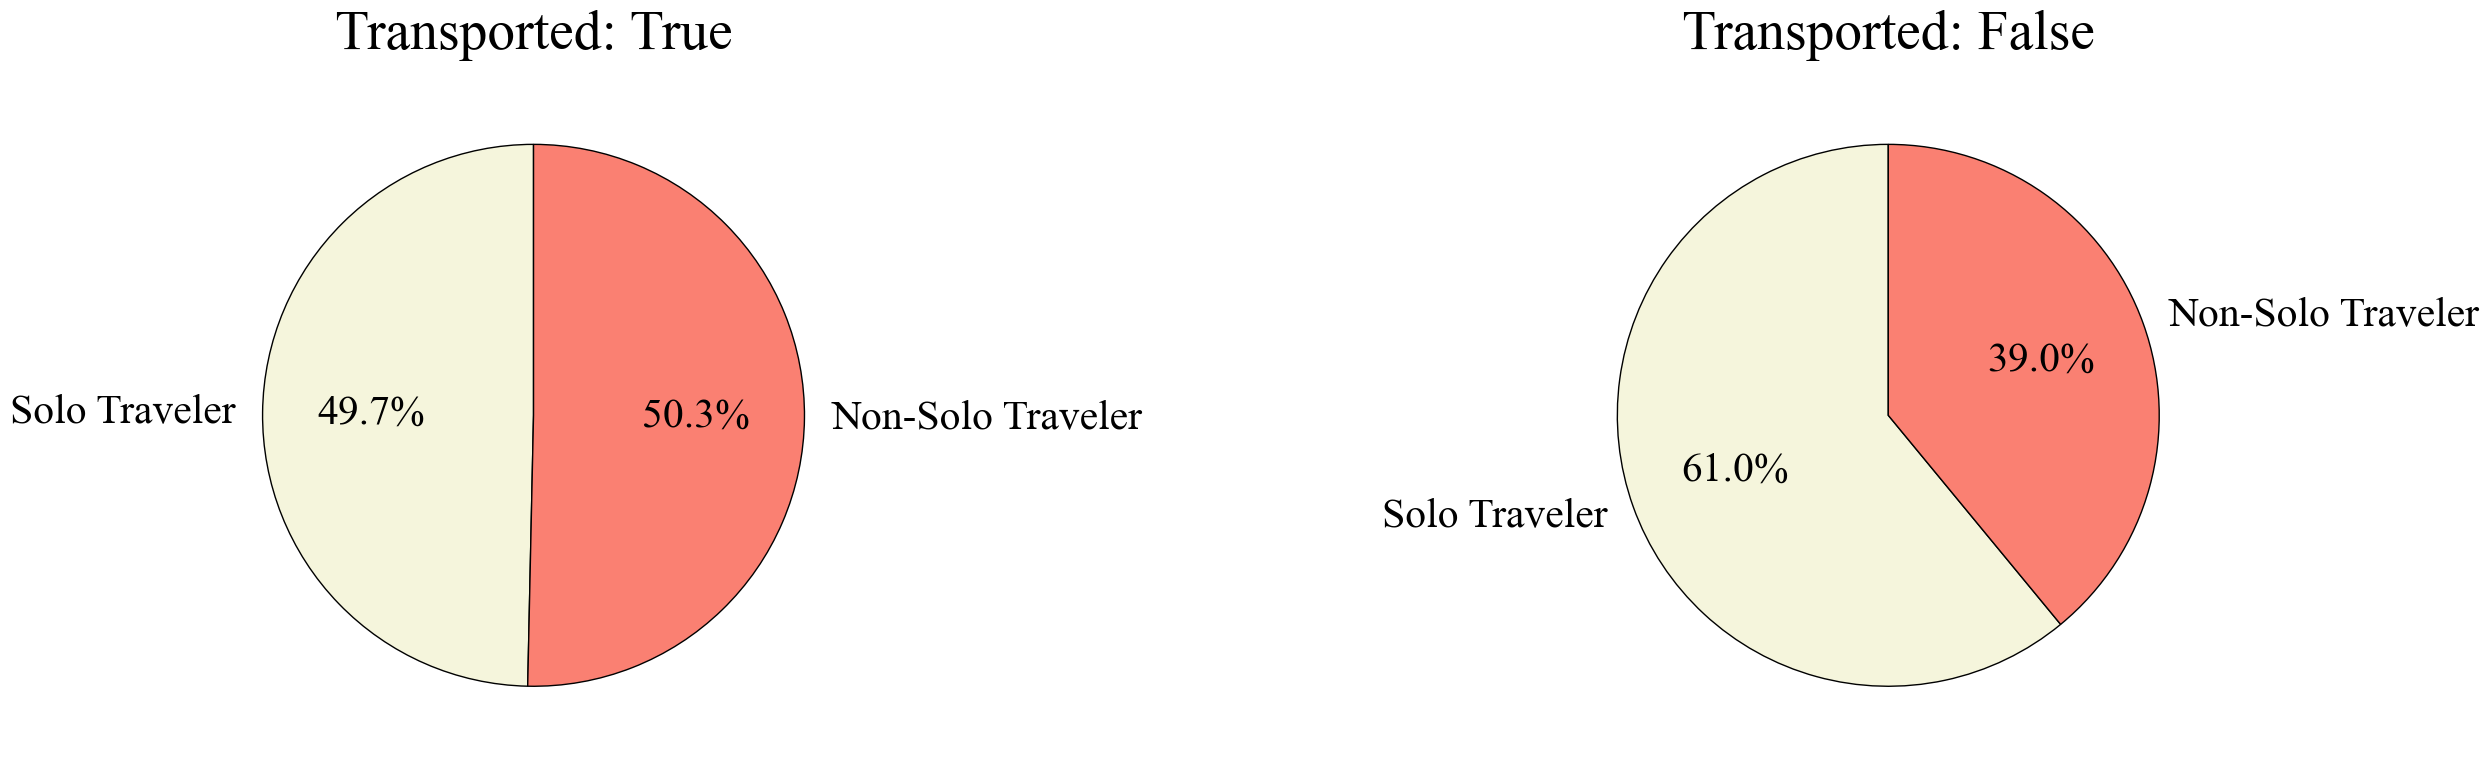

In [99]:
data_1 = transported_true_lone
data_2 = transported_false_lone 

lables = ['Solo Traveler', 'Non-Solo Traveler']

title_1 = 'Transported: True'
title_2 = 'Transported: False'

color_1 = color_9
color_2 = color_8

functions.sidebyside_piechart(data_1, data_2, title_1, title_2, color_1, color_2, lables, size)

### **Insights**

> * **Transported == True:** Percentage of solo and non-solo travelers were about the same.
> * **Transported == False:** Percentage of solo travelers was 1.5 times higher.
> * **Conclusion:** Solo status seems to be an important factor.

## **VIP Passengers**

In [100]:
transported_true_vip_true, transported_true_vip_false = functions.passenger_distribution(train, 'VIP', True)
transported_true_vip = [transported_true_vip_true, transported_true_vip_false]

In [101]:
transported_false_vip_true, transported_false_vip_false = functions.passenger_distribution(train, 'VIP', False)
transported_false_vip = [transported_false_vip_true, transported_false_vip_false]

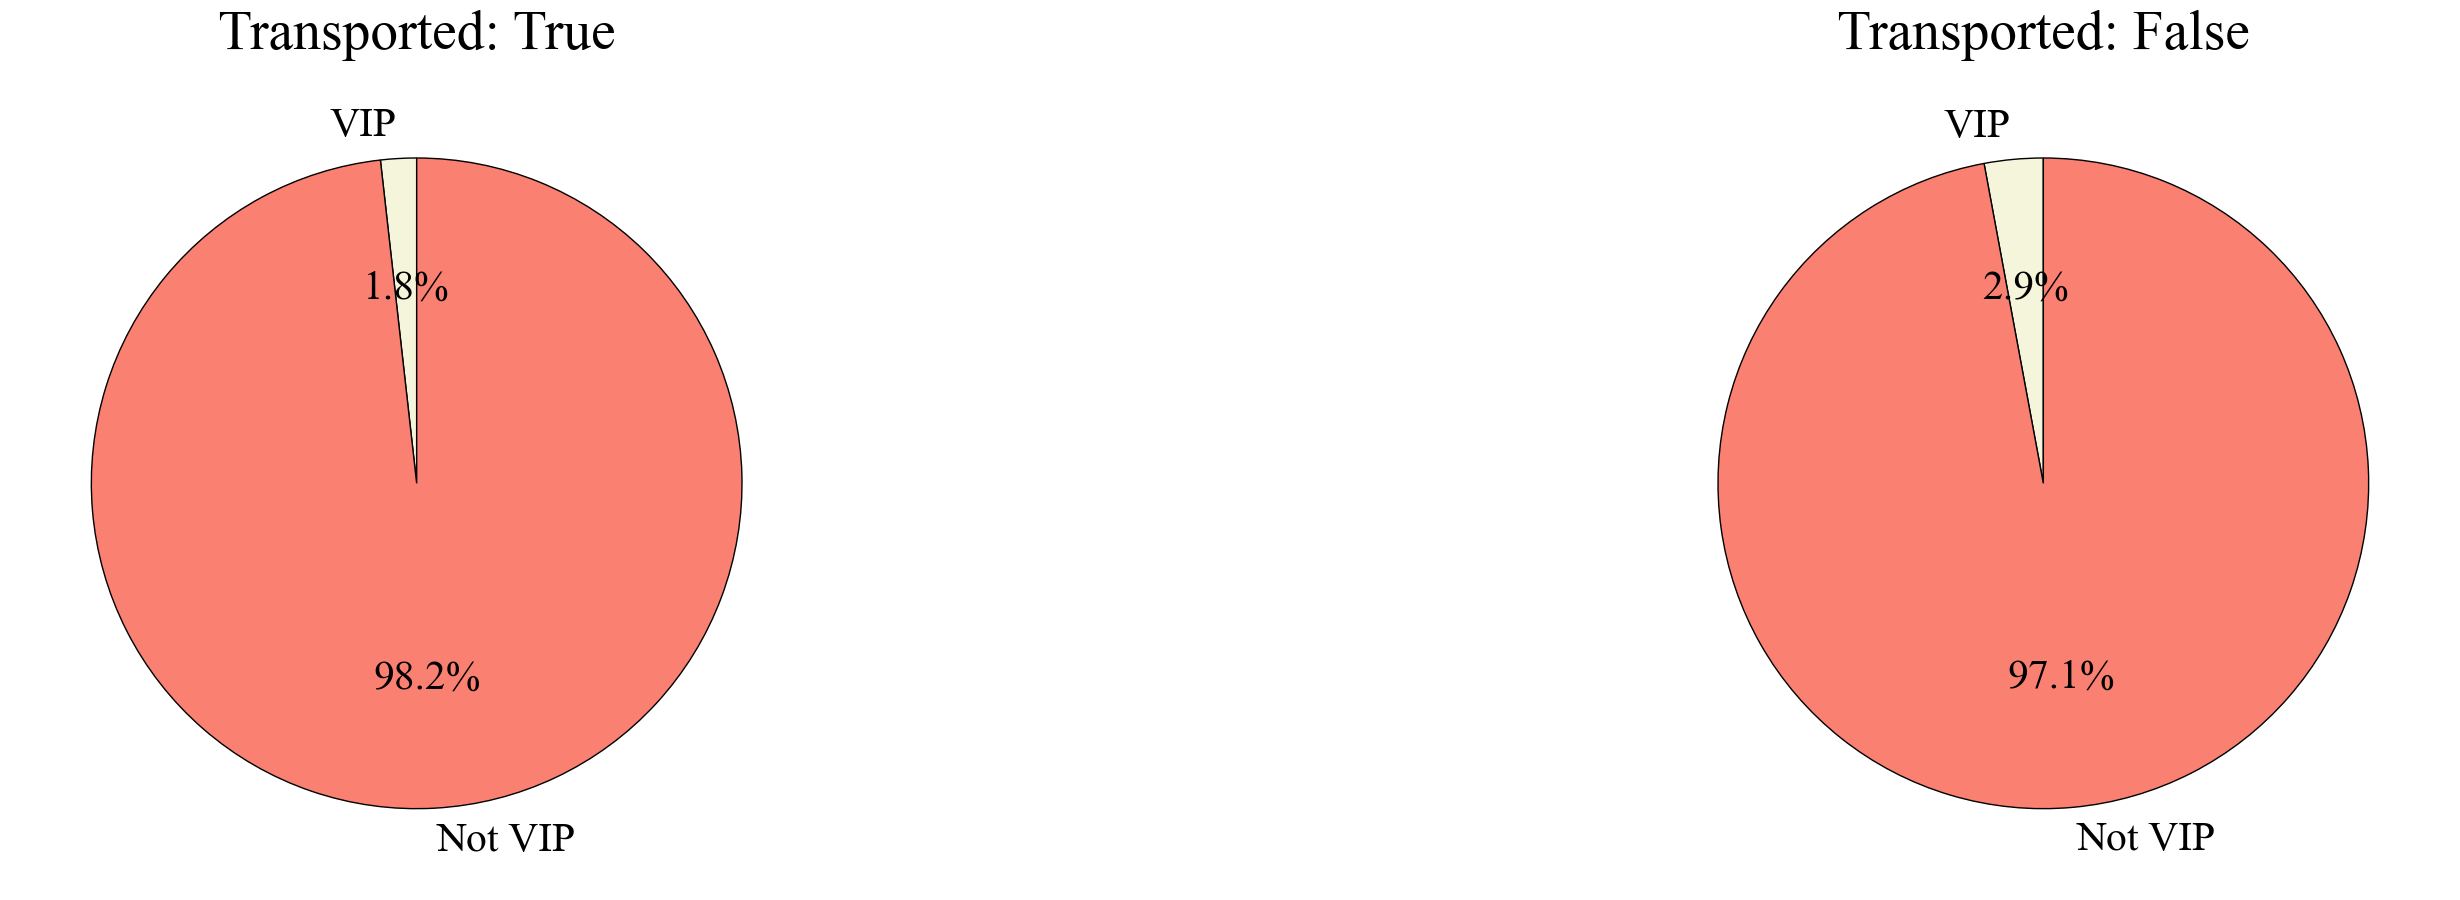

In [102]:
data_1 = transported_true_vip
data_2 = transported_false_vip

lables = ['VIP', 'Not VIP']

title_1 = 'Transported: True'
title_2 = 'Transported: False'

color_1 = color_9
color_2 = color_8

functions.sidebyside_piechart(data_1, data_2, title_1, title_2, color_1, color_2, lables, size)

### **Insights**

> * **Transported == True:** The vast majority of Transported passengers were Non-VIP.
> * **Transported == False:** The vast majority of Non-Transported passengers were Non-VIP.
> * **Conclusion:** VIP status does not seem to be an important factor.

## **Cryogenic Stasis**

In [103]:
transported_true_cryosleep_true, transported_true_cryosleep_false = functions.passenger_distribution(train, 'CryoSleep', True)
transported_true_cryosleep = [transported_true_cryosleep_true, transported_true_cryosleep_false]

In [104]:
transported_false_cryosleep_true, transported_false_cryosleep_false = functions.passenger_distribution(train, 'CryoSleep', False)
transported_false_cryosleep = [transported_false_cryosleep_true, transported_false_cryosleep_false]

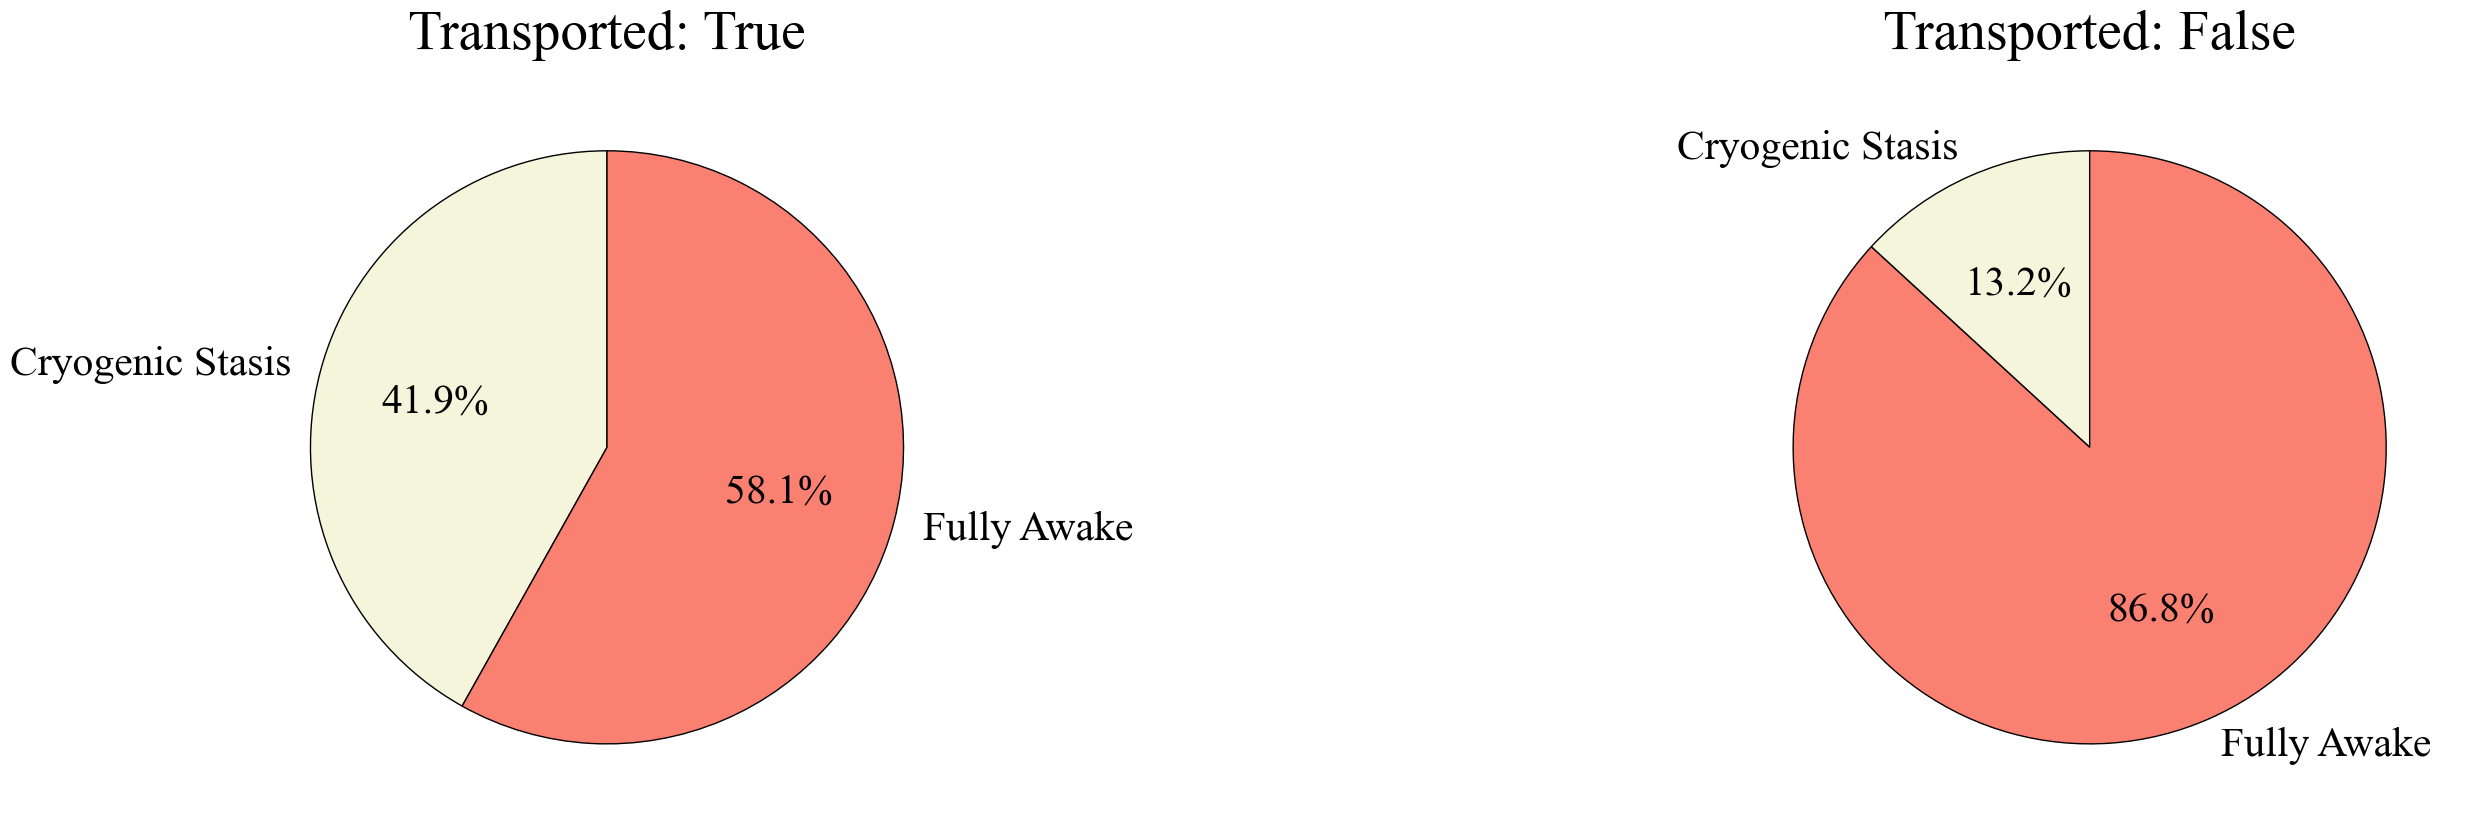

In [105]:
data_1 = transported_true_cryosleep
data_2 = transported_false_cryosleep

lables = ['Cryogenic Stasis', 'Fully Awake']

title_1 = 'Transported: True'
title_2 = 'Transported: False'

color_1 = color_9
color_2 = color_8

functions.sidebyside_piechart(data_1, data_2, title_1, title_2, color_1, color_2, lables, size)

### **Insights**

> * **Transported == True:** The vast majority of Transported passengers were fully awake.
> * **Transported == False:** A much bigger majority of Non-Transported passengers were fully awake.
> * **Conclusion:** Passengers who were fully awake were less likely to be transported.

## **Luxury Spending**

In [106]:
transported_true_spent_true, transported_true_spent_false = functions.passenger_distribution(train, 'Spent', True)
transported_true_spent = [transported_true_spent_true, transported_true_spent_false]

In [107]:
transported_false_spent_true, transported_false_spent_false = functions.passenger_distribution(train, 'CryoSleep', False)
transported_false_spent = [transported_false_spent_true, transported_false_spent_false]

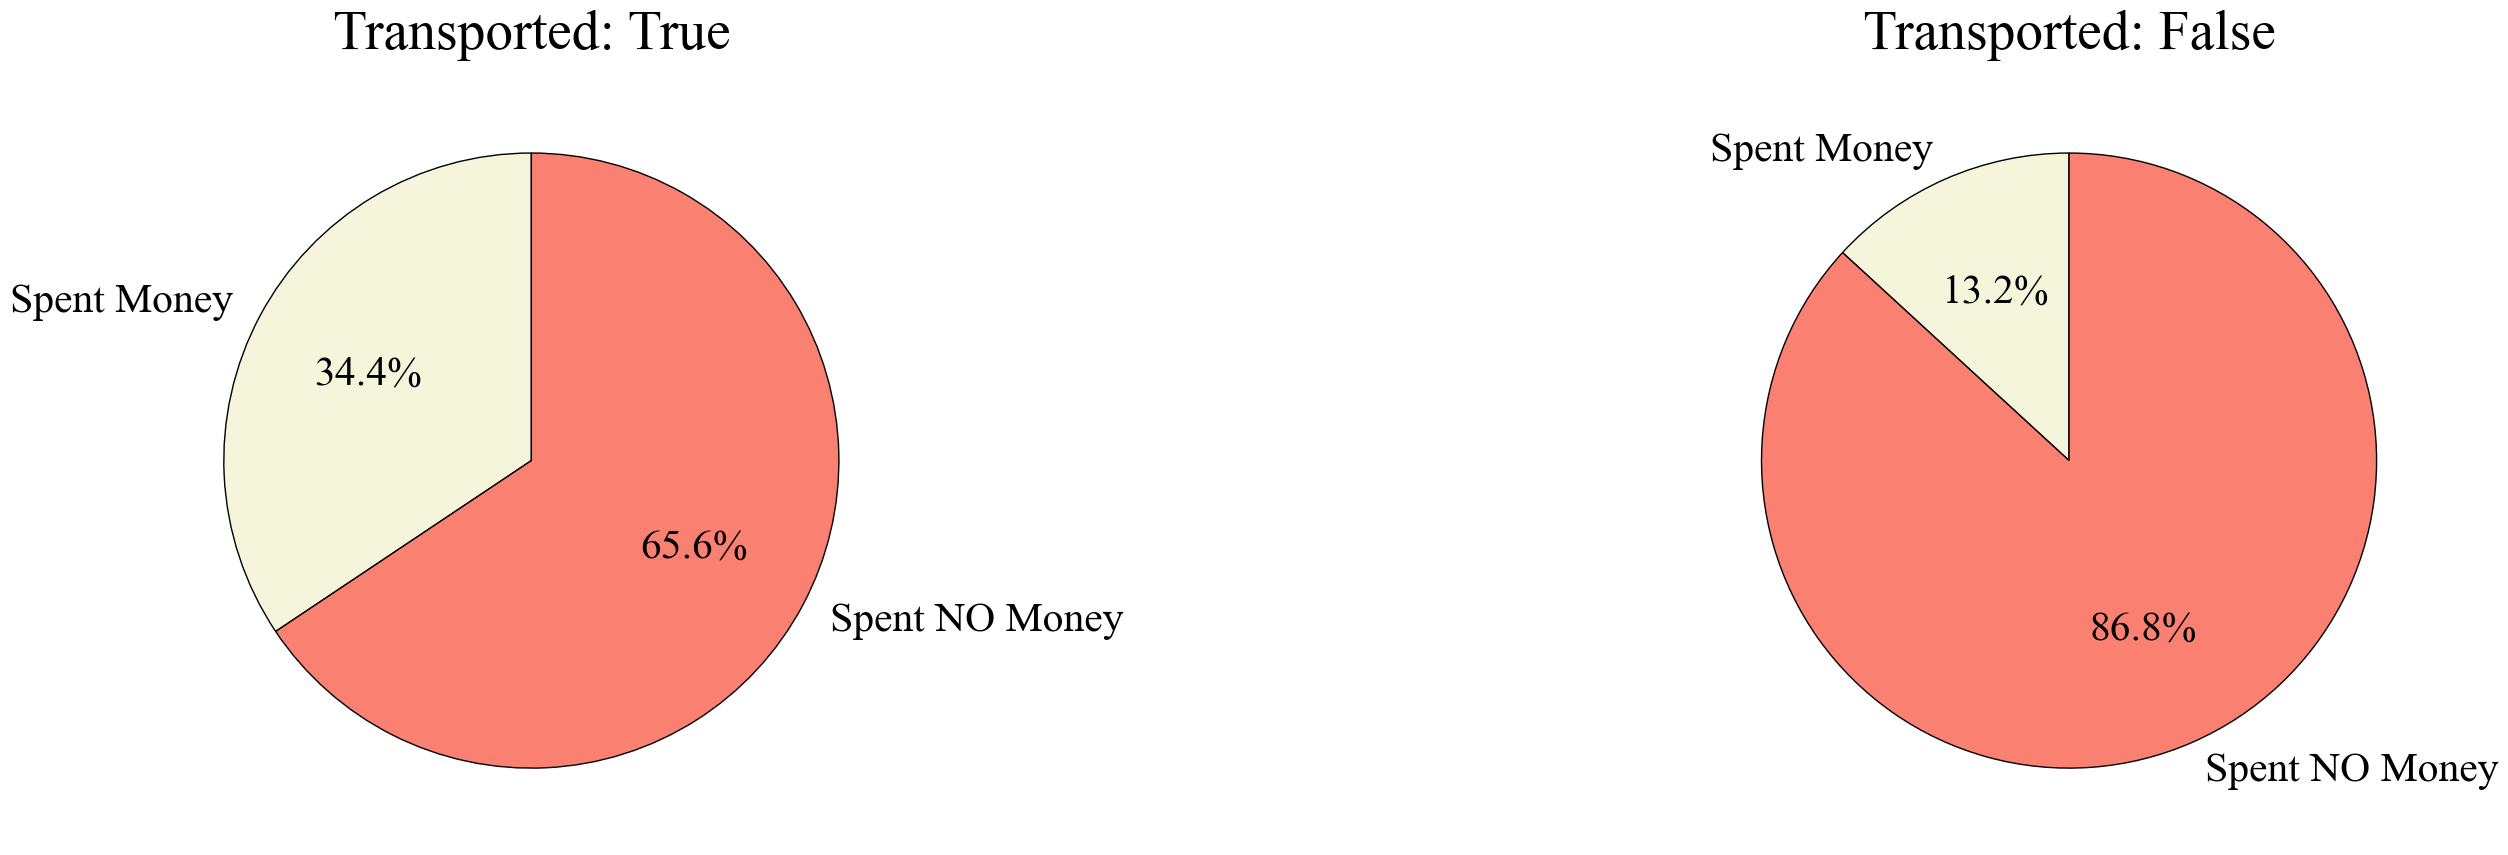

In [108]:
data_1 = transported_true_spent
data_2 = transported_false_spent

lables = ['Spent Money', 'Spent NO Money']

title_1 = 'Transported: True'
title_2 = 'Transported: False'

color_1 = color_9
color_2 = color_8

functions.sidebyside_piechart(data_1, data_2, title_1, title_2, color_1, color_2, lables, size)

### **Insights**

> * **Transported == True:** The vast majority of Transported passengers spend no money on luxury items.
> * **Transported == False:** A much bigger majority of Non-Transported passengers spent no money on luxury items.
> * **Conclusion:** Passengers who spent no money on luxury items were less likely to be transported.

## **Age Groups**

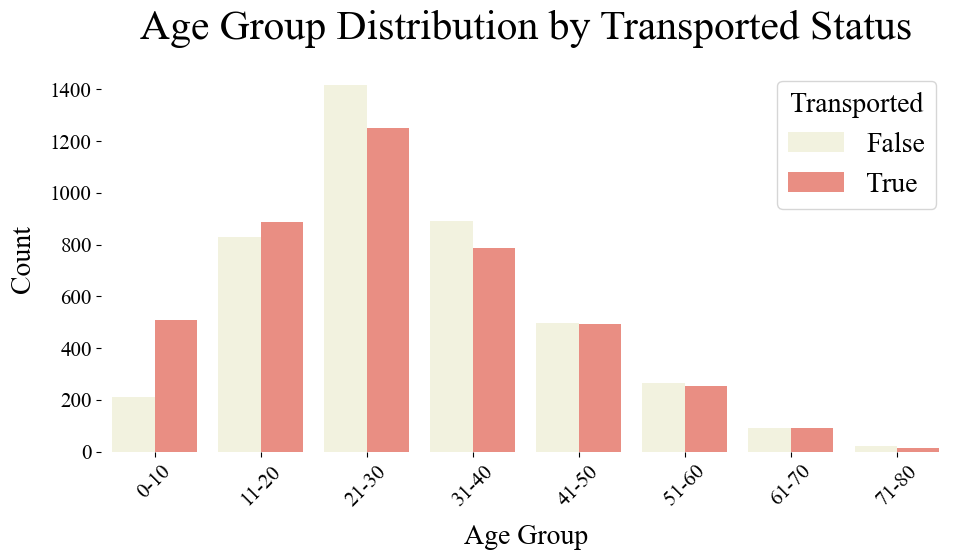

In [109]:
train['AgeGroup'] = np.nan
train.loc[train['Age'] <= 10, 'AgeGroup'] = '0-10'
train.loc[(train['Age'] > 10) & (train['Age'] <= 20), 'AgeGroup'] = '11-20'
train.loc[(train['Age'] > 20) & (train['Age'] <= 30), 'AgeGroup'] = '21-30'
train.loc[(train['Age'] > 30) & (train['Age'] <= 40), 'AgeGroup'] = '31-40'
train.loc[(train['Age'] > 40) & (train['Age'] <= 50), 'AgeGroup'] = '41-50'
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'AgeGroup'] = '51-60'
train.loc[(train['Age'] > 60) & (train['Age'] <= 70), 'AgeGroup'] = '61-70'
train.loc[(train['Age'] > 70) & (train['Age'] <= 80), 'AgeGroup'] = '71-80'

age_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
train['AgeGroup'] = pd.Categorical(train['AgeGroup'], categories=age_order, ordered=True)


custom_palette = {
    True: color_8,  
    False: color_9    
}


data = train
x = 'AgeGroup' 
hue = 'Transported'
palette = custom_palette
order = age_order
title = 'Age Group Distribution by Transported Status'
x_label = 'Age Group'
y_label = 'Count'
legend_title = 'Transported'


functions.countplot(data, x, hue, palette, order, title, x_label, y_label, legend_title)

train.drop('AgeGroup', axis=1, inplace=True)

### **Insights**

> * **Transported == True:** The age range with the most passengers was 21 - 40.
> * **Transported == False:** The age range with the most passengers was 21 - 40.
> * **Conclusion:** The age ranges of 21-40 contained the highest number of both Transported and Non-Transported passengers.

## **Spearman Correlation**

In [110]:
label_encoder = LabelEncoder()
obj = train.dtypes == "object"

for col in list(obj[obj].index):
    train[col] = label_encoder.fit_transform(train[col])

In [111]:
features = train.drop(target, axis=1)
target_values = train[target]
features = features.dropna()
target_values = target_values[features.index]

spearman_scores = {}

for column in features.columns:
    corr, _ = spearmanr(features[column], target_values)  # Compute correlation
    spearman_scores[column] = corr  # Store the correlation score

spearman_df = pd.DataFrame(spearman_scores.items(), columns=['Feature', 'Spearman Correlation'])
spearman_df = spearman_df.sort_values(by='Spearman Correlation', ascending=False)

print(spearman_df)

         Feature  Spearman Correlation
5      CryoSleep              0.431421
4     HomePlanet              0.124700
2      GroupSize              0.110814
8      CabinSide              0.109473
0    PassengerId              0.019183
1          Group              0.019181
20      LastName              0.009264
19     FirstName             -0.009843
11           VIP             -0.023197
7    CabinNumber             -0.047708
6      CabinDeck             -0.066928
10           Age             -0.076958
3   LoneTraveler             -0.109307
9    Destination             -0.111167
13     FoodCourt             -0.175525
14  ShoppingMall             -0.228713
16        VRDeck             -0.346411
12   RoomService             -0.363083
15           Spa             -0.370072
17   AmountSpent             -0.412333
18         Spent             -0.475506


### **Insights**

> * **Conclusion:** Cryosleep, and money spent on luxury items had the most influence than any other feature.

## **Mutual Information Plot**

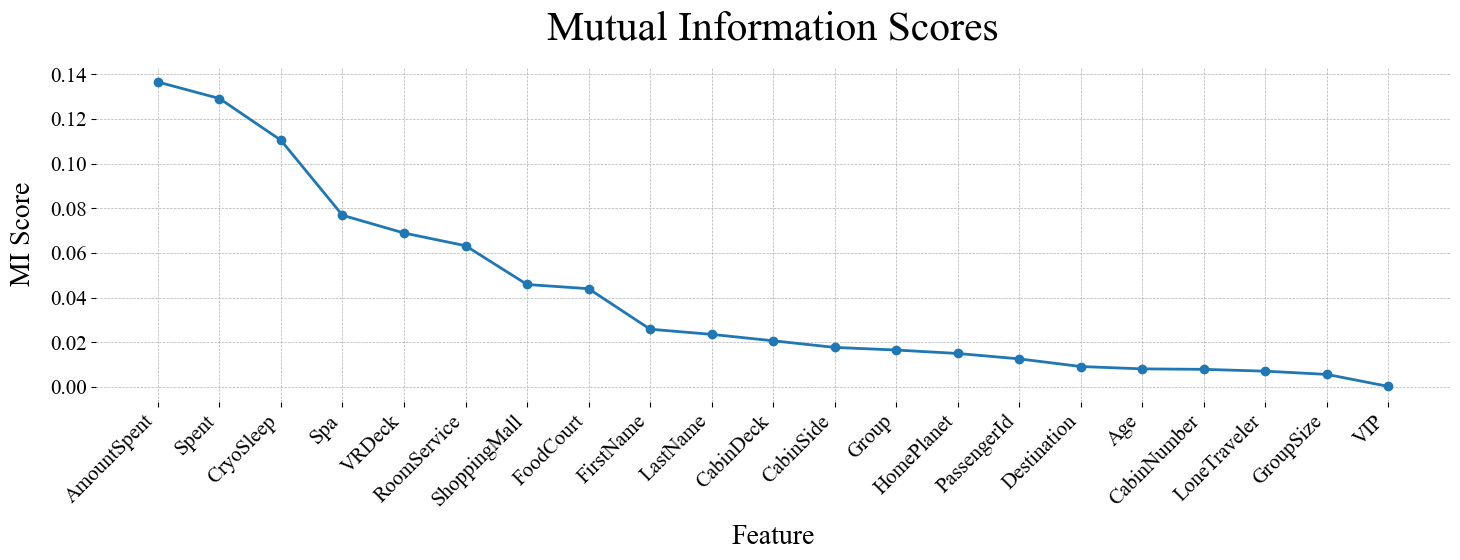

In [112]:
mi_scores = mutual_info_classif(features, target_values, random_state=random_state)
functions.create_plot_mi_scores(features, mi_scores)

### **Insights**

> * **Conclusion:** Cryosleep, and money spent on luxury items had the most influence than any other feature.